### Assignment-1 

By

Group Falcons

Benudhar Patra (c0834626)

Mohammad Al-Ajlouni (c0849924)

Viswanatha Reddy (c0836919)

Yashwanth Paladi (c0849467)

In [2]:
import tweepy
import csv
import time
import re
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import json
import seaborn as sns
import re
import collections
import os
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import datetime

### Twitter API connection

In [8]:
#keys are hidden due to security purposes, we can use our own keys to compile the code.
def create_api():
    consumer_key = os.getenv("CONSUMER_KEY")
    consumer_secret = os.getenv("CONSUMER_SECRET")
    access_token = os.getenv("ACCESS_TOKEN")
    access_token_secret = os.getenv("ACCESS_TOKEN_SECRET")

    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    try:
        api.verify_credentials()
    except Exception as e:
        raise e
    return api

#set count to however many tweets you want
number_of_tweets = 1000

### Twitter tags to collect data

In [3]:
listOfTags = ["#Altcoin", "#Gold", "#APPL", "#GOOG", "#YHOO" , "#Bitcoin", "#Coindesk", "#Cryptocurrency"]

### Collecting the Twitter Data

In [10]:
def get_tweet_and_create_file(tag):
    tweets_for_csv = []
    try:
        for tweet in tweepy.Cursor(api.search_tweets, q=tag, lang="en", until="2022-06-20").items(number_of_tweets):
            tweets_for_csv.append([tweet.created_at, tweet.id_str, tweet.text.encode("utf-8"), tweet.user.screen_name])
        
        outfile = tag+"_tweets.csv"
        print("writing to " + outfile)
        with open(outfile, 'w+') as file:
            writer = csv.writer(file, delimiter=',')
            writer.writerows(tweets_for_csv)
    except Exception as e:
        raise e

### Writing data to CSV

In [14]:
api = create_api()
for tag in listOfTags:
    get_tweet_and_create_file(tag)

writing to #Altcoin_tweets.csv
writing to #Gold_tweets.csv
writing to #APPL_tweets.csv
writing to #GOOG_tweets.csv
writing to #YHOO_tweets.csv
writing to #Bitcoin_tweets.csv
writing to #Coindesk_tweets.csv
writing to #Cryptocurrency_tweets.csv


In [4]:
def read_csv(fileName):
    df = pd.read_csv(fileName, names=["created_at","id", "text", "user_id"])
    print(df.head(3))
    return df
    

In [14]:
df_altcoin=read_csv("#Altcoin_tweets.csv")
df_appl=read_csv("#APPL_tweets.csv")
df_bitcoin=read_csv("#Bitcoin_tweets.csv")
df_coindesk=read_csv("#Coindesk_tweets.csv")
df_gold=read_csv("#Gold_tweets.csv")
df_goog=read_csv("#GOOG_tweets.csv")
df_yhoo=read_csv("#YHOO_tweets.csv")
df_crypto=read_csv("#Cryptocurrency_tweets.csv")

                  created_at                   id  \
0  2022-06-19 23:59:45+00:00  1538672916652515328   
1  2022-06-19 23:59:40+00:00  1538672895936839680   
2  2022-06-19 23:59:20+00:00  1538672811673325568   

                                                text         user_id  
0  b'RT @cpansherry1777: @Cujopelli666 @kucoincom...  cpansherry1777  
1  b'@Cujopelli666 @kucoincom @ArchieNeko_ #Archi...  cpansherry1777  
2  b"@AltcoinWorldcom Ignore any #altcoin that pr...   Eth_connect61  
                  created_at                   id  \
0  2022-06-19 21:12:20+00:00  1538630788224122880   
1  2022-06-20 15:01:02+00:00  1538537343644160001   

                                                text        user_id  
0  b'@1goonrich I\xe2\x80\x99m still here and not...    im_ba1tazar  
1  b'@GregFromCos @SWXSWPhotos @paulkrugman Oh Si...  Marco27450336  
                  created_at                   id  \
0  2022-06-19 23:59:59+00:00  1538672976736174080   
1  2022-06-19 23:59:59+00:0

### Write to Json

In [54]:
df_altcoin.to_json(r'D:\Altcoin_tweets.json')
df_appl.to_json(r'D:\APPL_tweets.json')
df_bitcoin.to_json(r'D:\Bitcoin_tweets.json')
df_coindesk.to_json(r'D:\Coindesk_tweets.json')
df_gold.to_json(r'D:\Gold_tweets.json')
df_goog.to_json(r'D:\GOOG_tweets.json')
df_yhoo.to_json(r'D:\YHOO_tweets.json')
df_crypto.to_json(r'D:\Cryptocurrency_tweets.json')

In [26]:
df_list=[df_altcoin,df_appl,df_bitcoin,df_coindesk,df_gold,df_goog,df_crypto,df_yhoo]

## Data Cleaning

In [17]:
def clean_data(df):
    df['text'] = df['text'].str.replace(r'[^\w\s]+', '')
    df['text'] = df['text'].str.replace('\d+', '')
    df['text']=df.text.str.replace(r'\b(\w{1,2})\b', '')
    df['created_at'] = pd.to_datetime(df['created_at']).dt.date
    df.drop_duplicates(subset ="text",keep = False, inplace = True)

In [18]:
for dataframe in df_list:
    clean_data(dataframe)

C:\Users\mjeha\AppData\Local\Temp\ipykernel_23984\130510027.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'[^\w\s]+', '')
C:\Users\mjeha\AppData\Local\Temp\ipykernel_23984\130510027.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\d+', '')
C:\Users\mjeha\AppData\Local\Temp\ipykernel_23984\130510027.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text']=df.text.str.replace(r'\b(\w{1,2})\b', '')
C:\Users\mjeha\AppData\Local\Temp\ipykernel_23984\130510027.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'[^\w\s]+', '')
C:\Users\mjeha\AppData\Local\Temp\ipykernel_23984\130510027.py:3: FutureWarning: The default value of regex will change from True to False in a fu

## Visualization

In [45]:
def visualize_tweets(df, tag):
    x = np.unique(df["created_at"])
    y = df['created_at'].value_counts()
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))
    plt.ylabel("number of tweets")
    plt.xlabel("creation date")
    plt.title(tag+"_Tweets")
    plt.bar(x,y)
    plt.show()

In [46]:
def visualize_users(df, tag):
    df_users=df[["created_at", 'user_id']].value_counts()
    x = np.unique(df["created_at"])
    y = df_users.groupby(['created_at']).sum()
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))
    plt.ylabel("number of users")
    plt.xlabel("creation date")
    plt.title(tag+"_User")
    plt.bar(x,y)
    plt.show()

In [47]:
listOfTags = ["#Altcoin",  "#APPL",  "#Bitcoin", "#Coindesk","#Gold", "#GOOG", "#Cryptocurrency", "#YHOO"]

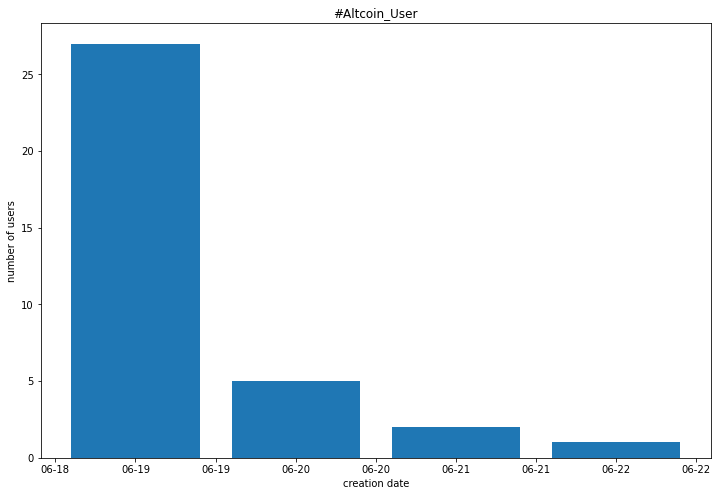

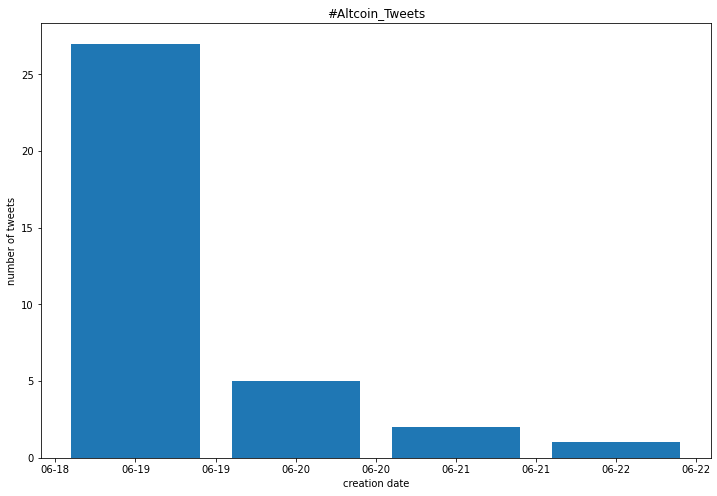

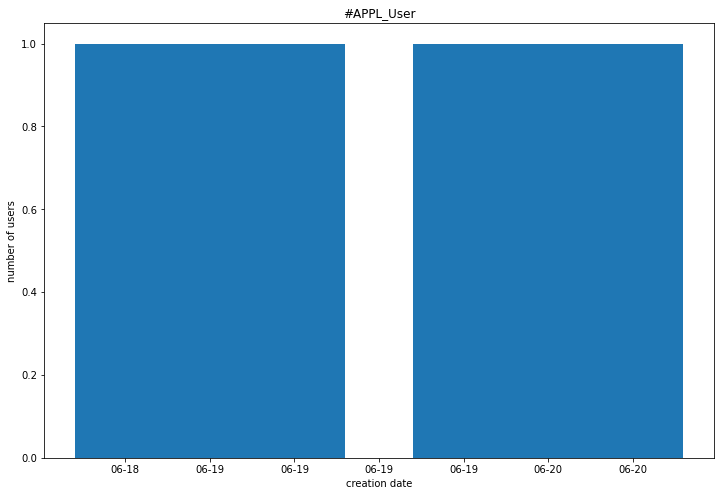

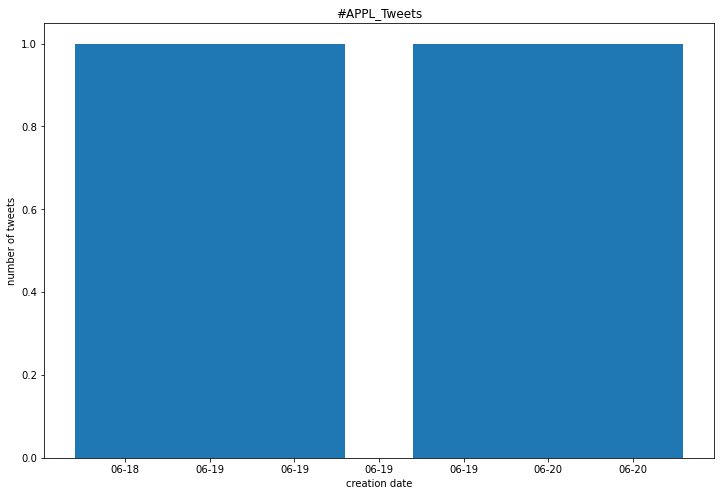

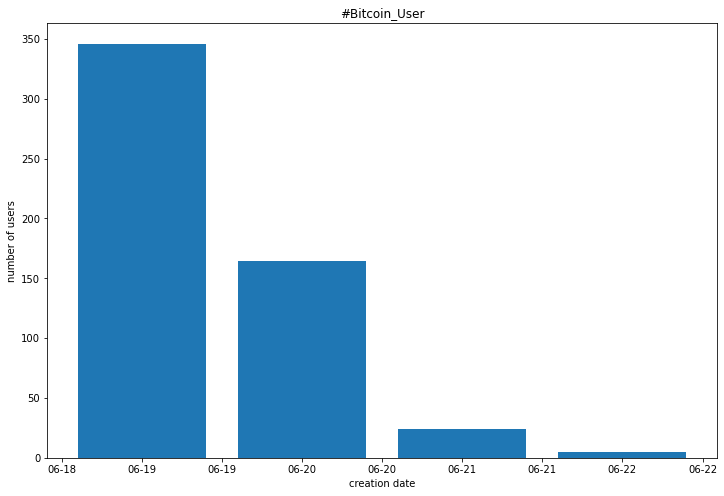

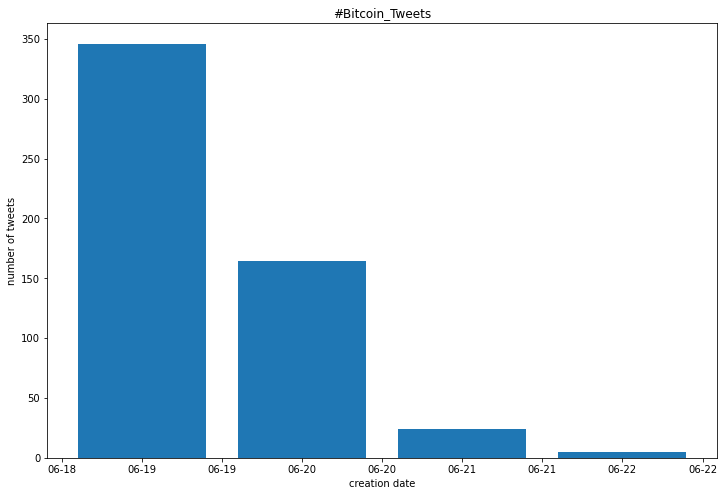

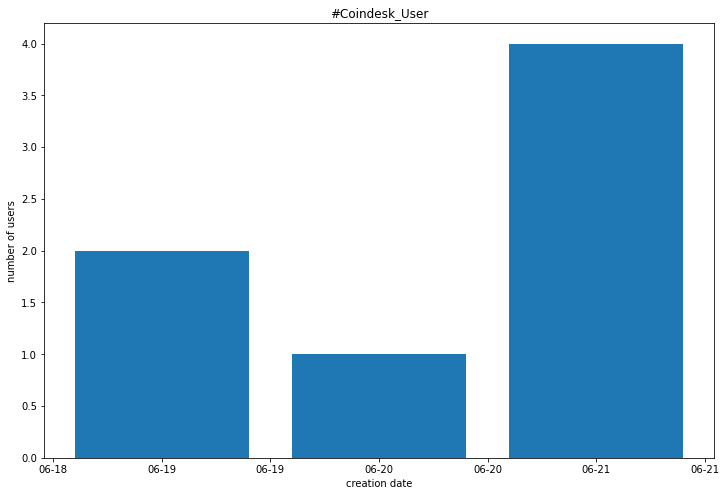

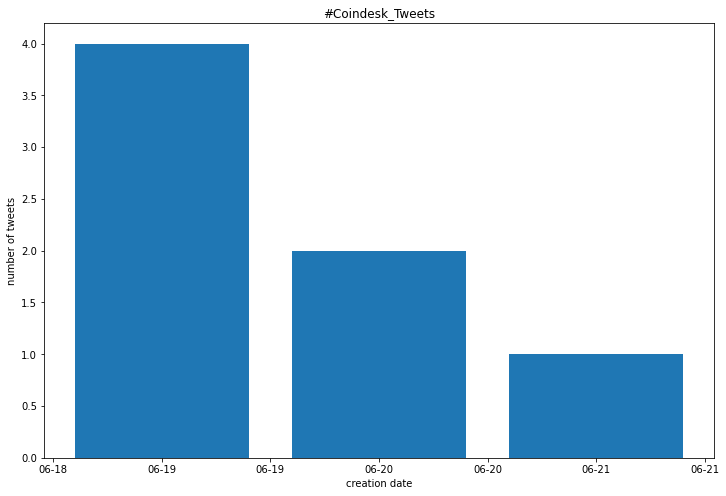

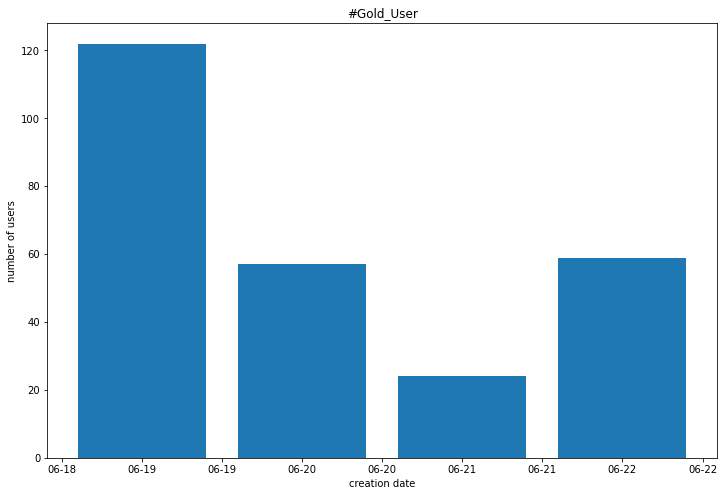

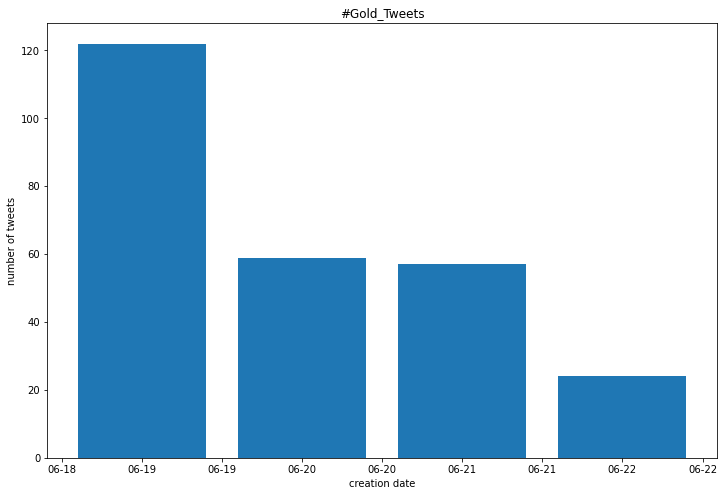

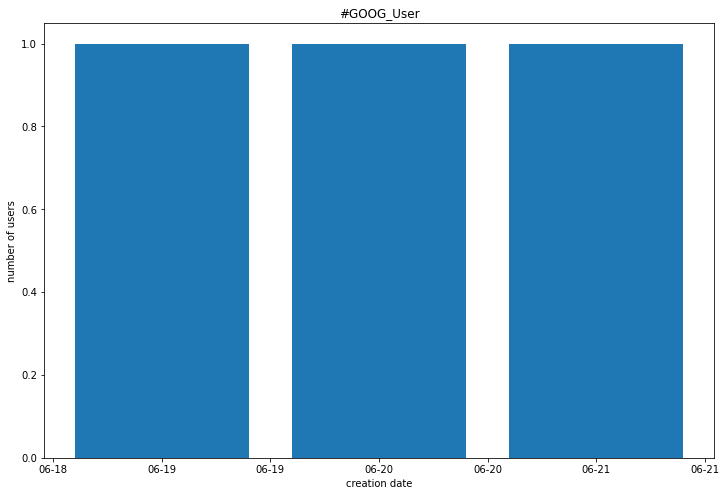

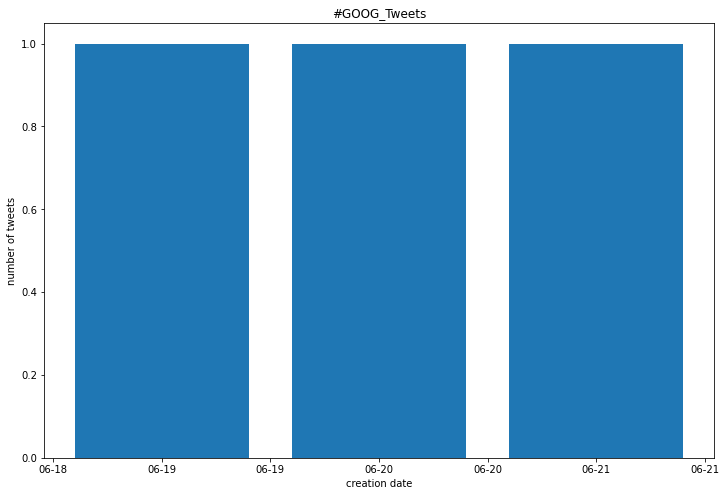

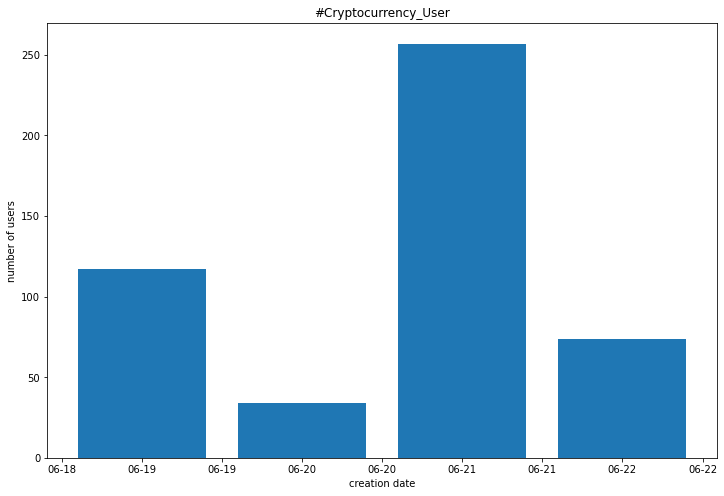

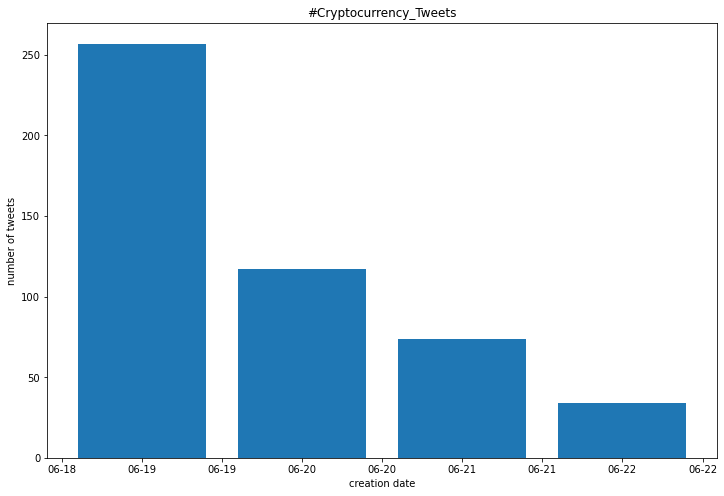

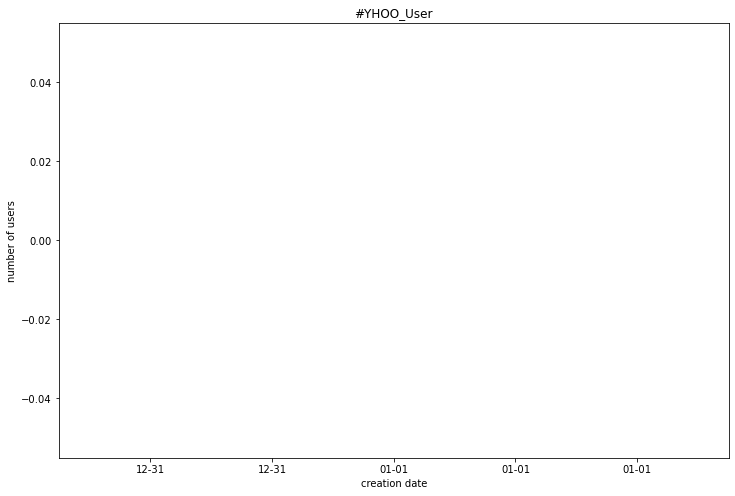

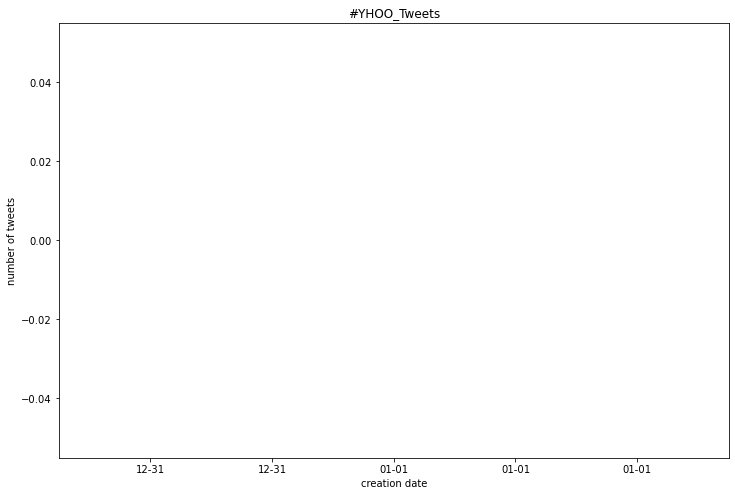

In [51]:
df_list=[df_altcoin,df_appl,df_bitcoin,df_coindesk,df_gold,df_goog,df_crypto,df_yhoo]
count=0
for i in df_list:
    visualize_users(i, listOfTags[count])
    visualize_tweets(i, listOfTags[count])
    count=count+1

In [52]:
#Trying to find the most trendy words related to tweets collected with respect to the #keyterms and visualizing using WordCloud technique
def wordclould_visualization(df, tag):
    hashtags = []
    hashtag_pattern = re.compile(r"[a-zA-Z]+")
    hashtag_matches = list(df.apply(hashtag_pattern.findall))
    hashtag_dict = {}
    for match in hashtag_matches:
        for singlematch in match:
            if singlematch not in hashtag_dict.keys():
                hashtag_dict[singlematch] = 1
            else:
                hashtag_dict[singlematch] = hashtag_dict[singlematch]+1
                
    hashtag_ordered_list =sorted(hashtag_dict.items(), key=lambda x:x[1])
    hashtag_ordered_list = hashtag_ordered_list[::-1]
    #Separating the hashtags and their values into two different lists
    hashtag_ordered_values = []
    hashtag_ordered_keys = []
    #Pick the 20 most used hashtags to plot
    for item in hashtag_ordered_list[0:20]:
        hashtag_ordered_keys.append(item[0])
        hashtag_ordered_values.append(item[1])
        
    hashtag_ordered_dict = {}
    for item in hashtag_ordered_list[0:20]:
        hashtag_ordered_dict[item[0]] = item[1]
    wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(hashtag_ordered_dict)
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(tag)

    plt.show()

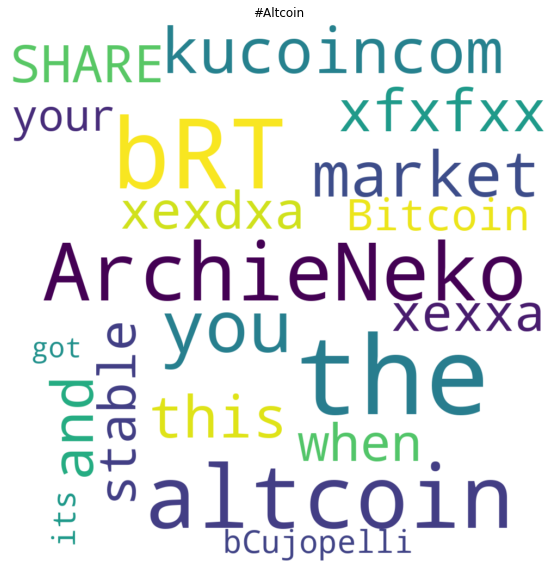

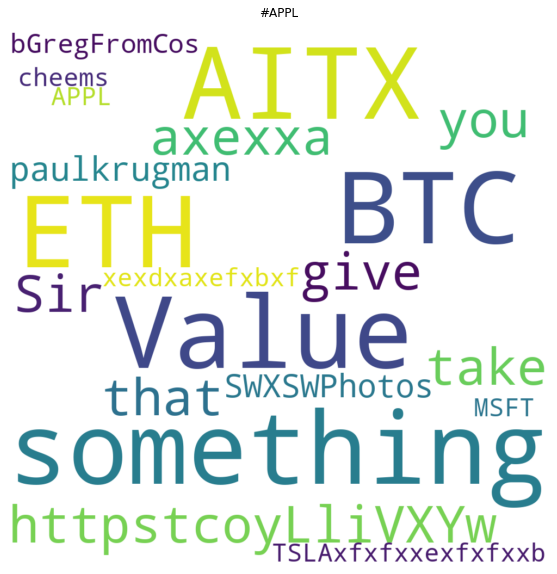

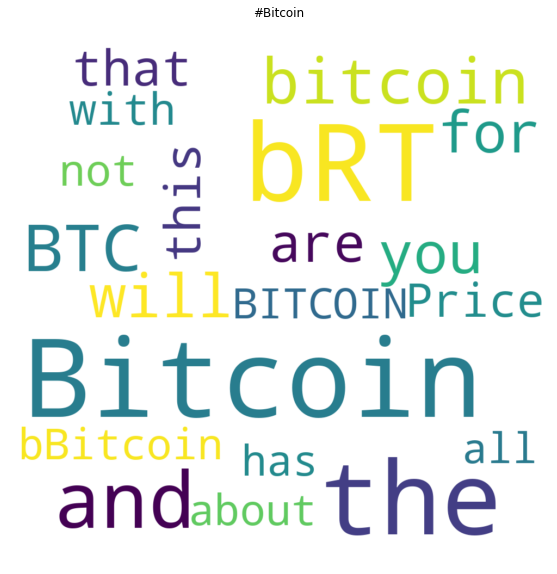

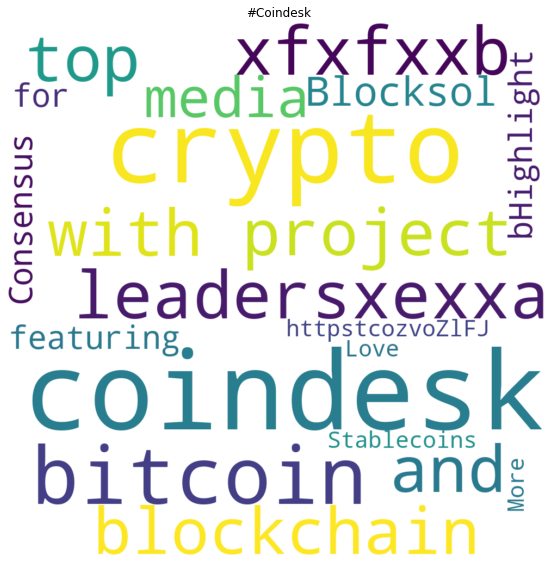

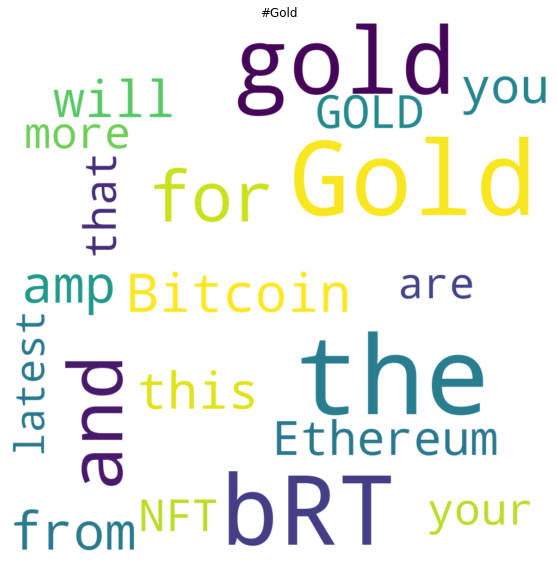

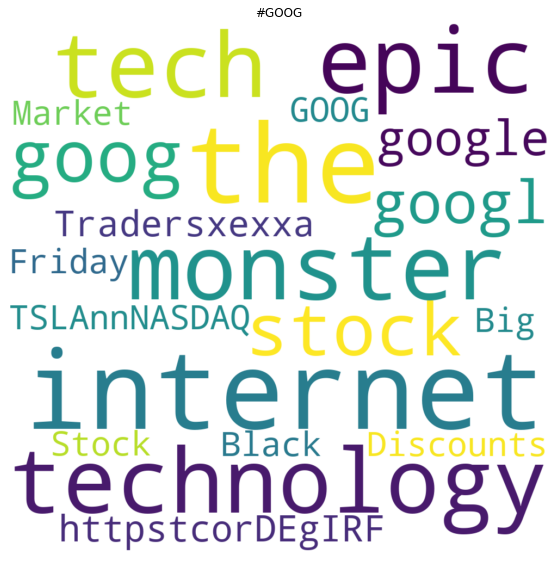

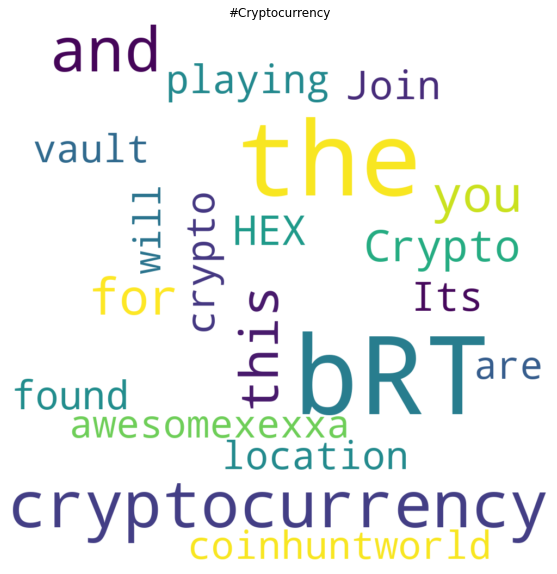

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [53]:
#for #YHOO we are observing some sort of error, as we didn't had any tweets information for the dates specified which belongs to YHOO keyterm.
count=0
for dff in df_list:
    wordclould_visualization(dff['text'], listOfTags[count])
    print('\n\n')
    count=count+1